In [2]:
import numpy as np
import crsutil as crs
import tleplot as tle
import matplotlib.pyplot as plt
import cmocean

#%matplotlib qt


In [3]:
gpsERS = tle.tleread('GPS.txt',verbose=0)
t = tle.tledatenum(['2021-11-15 0:00:00', 24*60 ,1])
xsat,vsat = tle.tle2vec(gpsERS,t,'GPS BIIR-2')
xsate,vsate = crs.eci2ecef(t,xsat=xsat,vsat=vsat)
xsat_noJ2,vsat_noJ2 = tle.tle2vec(gpsERS,t,'GPS BIIR-2',propagation="NOJ2")
xsate_noJ2,vsate_noJ2 = crs.eci2ecef(t,xsat=xsat_noJ2,vsat=vsat_noJ2,)


To plot the difference between orbits with and without the J2 effect considered both are added to the same plot

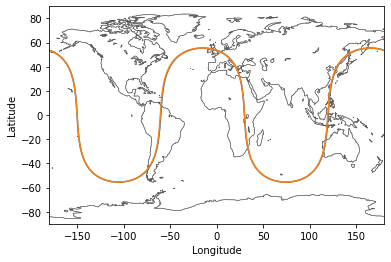

In [3]:
plt.figure()
tle.pltgroundtrack(xsate)
tle.pltgroundtrack(xsate_noJ2)

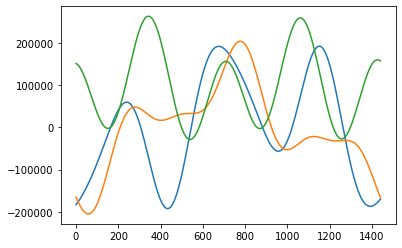

In [4]:
j2_noj2_diff = xsate-xsate_noJ2
plt.plot(j2_noj2_diff)

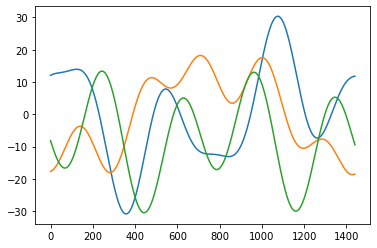

In [5]:
plt.plot(vsate-vsate_noJ2)

array([ 90.35642572,  94.33438729,  98.11646528, ...,  98.41658321,
       101.98644687, 105.36049693])

AttributeError: 'Line2D' object has no property 'cmap'

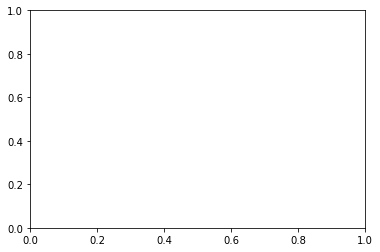

In [9]:
vxe = vsate[:,0]
norm = plt.Normalize(vxe.max(),vxe.min())
plt.plot(xsate[:,0],cmap=cmocean.cm.speed,norm=norm)